---
# EE0005 EE06 TEAM 9

Dataset used: **Fake / Fake Job Posting** by *University of the Aegean*                                 
Source: https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction

Problem: Using the data provided by different companies to determine whether the job offer stated can be considered fraudulent

---
## Section 1: Setup
Importing the essential libraries and dataset, as well as check the dataset's properties.

### Importing Essential Libraries

In [1]:

import re
import string
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.svm import SVC
from os import path

In [2]:
#Quick overview of dataset
fakejob = pd.read_csv('fake_job_postings.csv')
fakejob.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Checking the variables and their data types


In [3]:
fakejob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
fakejob.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


---
## Section 2: Pre-processing

Exploring the dataset and preparing the dataset for use in Visualization and Machine Learning Modelling.

C:\Users\Wayne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


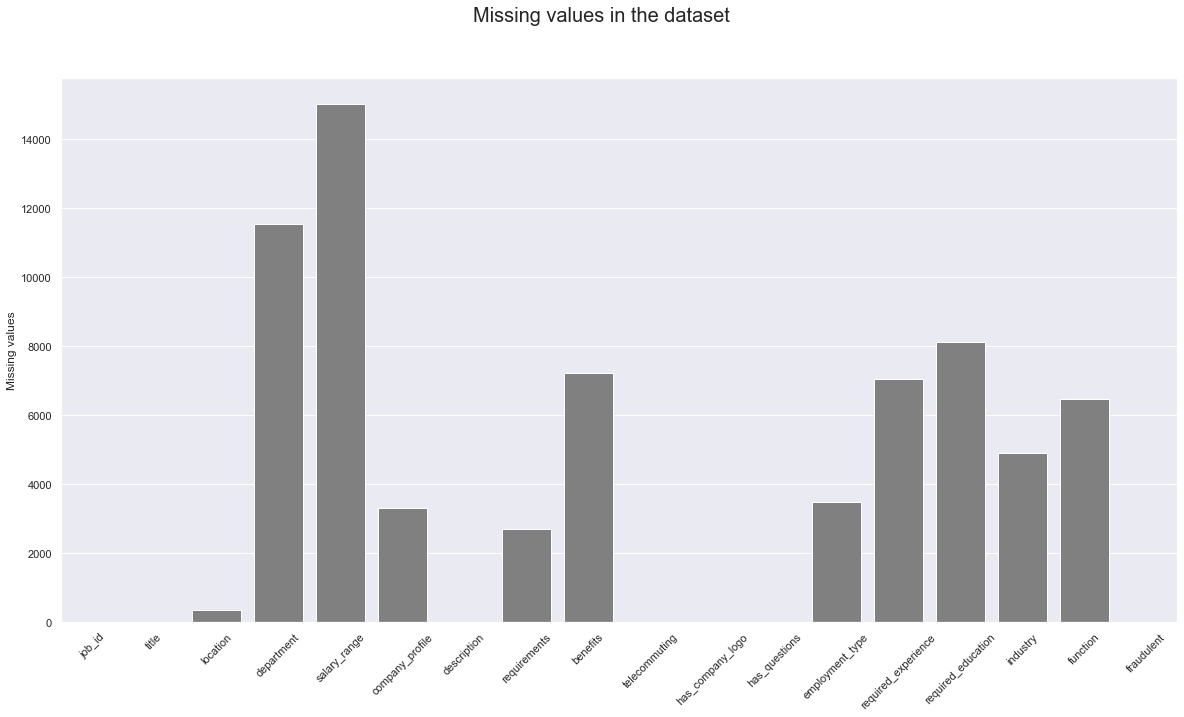

In [5]:
#Checking for the missing values in the data set
null_values = fakejob.isnull().sum()
plt.figure(figsize = (20,10))
sb.barplot(null_values.index, null_values, color = 'grey')
plt.suptitle('Missing values in the dataset', size = 20)
plt.ylabel('Missing values')
plt.xticks(rotation = '45')
plt.show()

In [6]:
#Checking for unique rows in each columns
categorical_columns = []
for col in fakejob.columns:
    print(f'Unique rows in {col}:', fakejob[col].nunique())
    if fakejob[col].nunique() < 15:
        categorical_columns.append(col)
print('Categorical columns:',categorical_columns)

Unique rows in job_id: 17880
Unique rows in title: 11231
Unique rows in location: 3105
Unique rows in department: 1337
Unique rows in salary_range: 874
Unique rows in company_profile: 1709
Unique rows in description: 14801
Unique rows in requirements: 11968
Unique rows in benefits: 6205
Unique rows in telecommuting: 2
Unique rows in has_company_logo: 2
Unique rows in has_questions: 2
Unique rows in employment_type: 5
Unique rows in required_experience: 7
Unique rows in required_education: 13
Unique rows in industry: 131
Unique rows in function: 37
Unique rows in fraudulent: 2
Categorical columns: ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent']


In [7]:
# using variables that are viewed as needed for data analysis
fakejobimpt = pd.DataFrame(fakejob[['title', 'location', 'telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','fraudulent']])
fakejobimpt

,title,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [8]:
#Replace the NULL values in the text columns by empty strings
fakejobimpt['industry'] = fakejobimpt['industry'].astype('category')
fakejobimpt['function'] = fakejobimpt['function'].astype('category')

for col in list(set(fakejobimpt.columns) - set(categorical_columns)):
    if fakejobimpt[col].dtypes == 'object':
        fakejobimpt[col] = fakejob[col].fillna('')
print(fakejobimpt.isnull().sum())

title                     0
location                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64


In [9]:
#Replacing all the empty cells with string and setting them as unavailable
fakejobimpt['employment_type'] = fakejobimpt['employment_type'].fillna('Employement Unavailable')
fakejobimpt['required_experience'] = fakejobimpt['required_experience'].fillna('Experience Unavailable')
fakejobimpt['required_education'] = fakejobimpt['required_education'].fillna('Education Unavailable')
fakejobimpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   title                17880 non-null  object  
 1   location             17880 non-null  object  
 2   telecommuting        17880 non-null  int64   
 3   has_company_logo     17880 non-null  int64   
 4   has_questions        17880 non-null  int64   
 5   employment_type      17880 non-null  object  
 6   required_experience  17880 non-null  object  
 7   required_education   17880 non-null  object  
 8   industry             12977 non-null  category
 9   function             11425 non-null  category
 10  fraudulent           17880 non-null  int64   
dtypes: category(2), int64(4), object(5)
memory usage: 1.3+ MB


---
## Section 3:   Data Visualization 
(comments)We chose to display single plots as single plots are bigger and easier to view


C:\Users\Wayne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


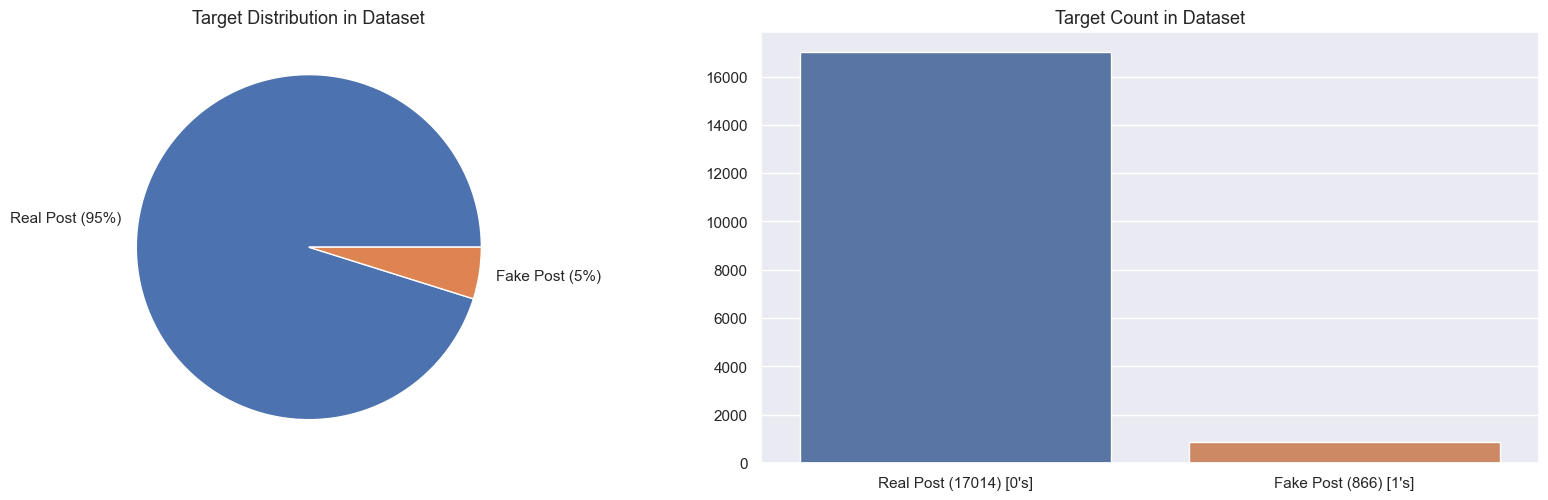

In [10]:
# data visualization
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

fakejob["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])
temp = fakejob["fraudulent"].value_counts()
sb.barplot(temp.index, temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post (17014) [0's]", "Fake Post (866) [1's]"])

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

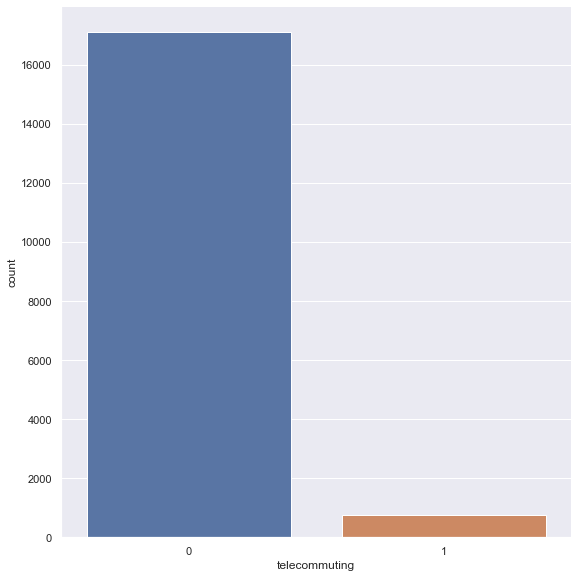

In [11]:
sb.catplot(x = 'telecommuting', data = fakejobimpt, kind = "count", height = 8)

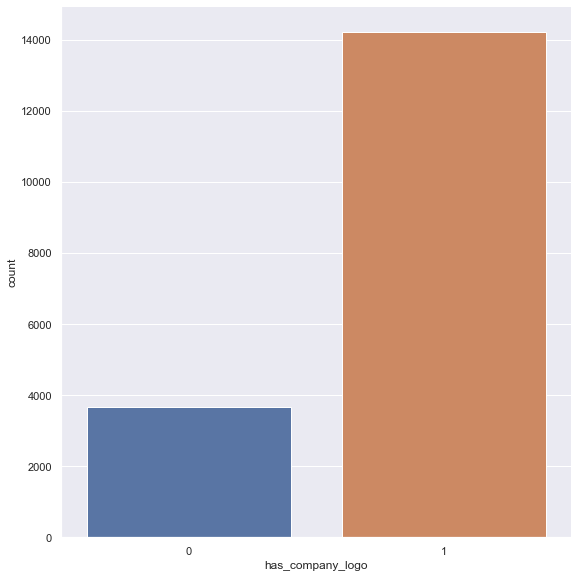

In [12]:
sb.catplot(x = 'has_company_logo', data = fakejobimpt, kind = "count", height = 8)

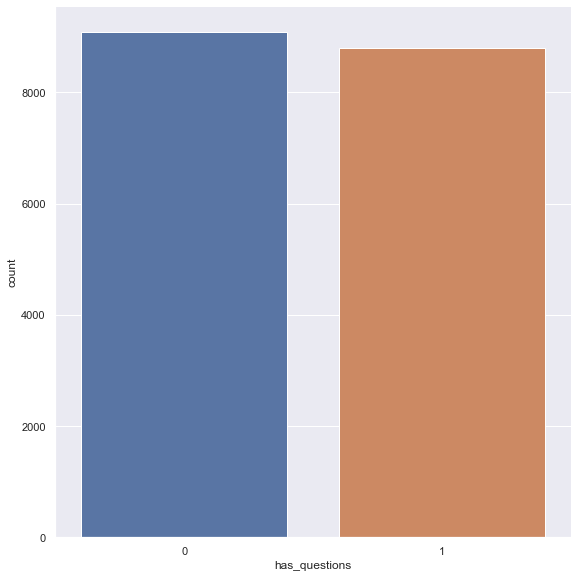

In [13]:
sb.catplot(x = 'has_questions', data = fakejobimpt, kind = "count", height = 8)

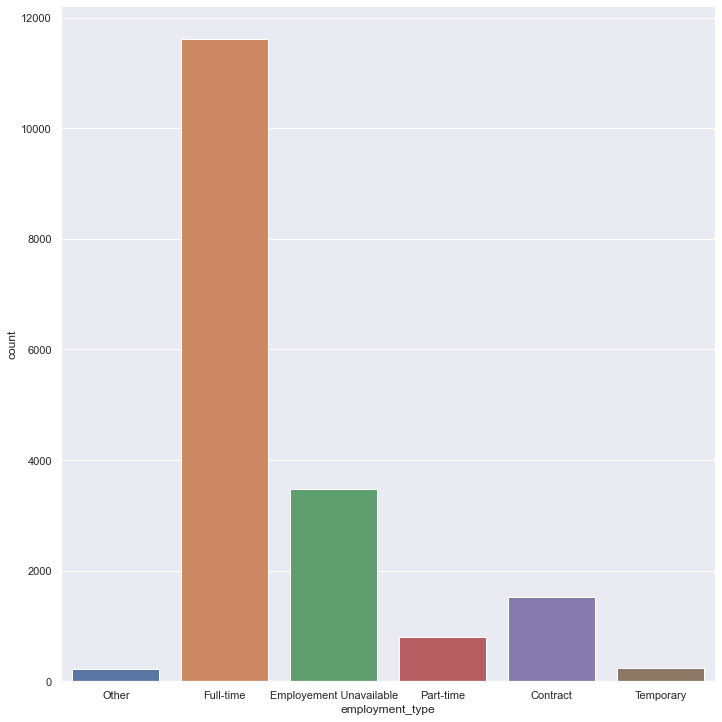

In [14]:
sb.catplot(x = 'employment_type', data = fakejobimpt, kind = "count", height = 10)

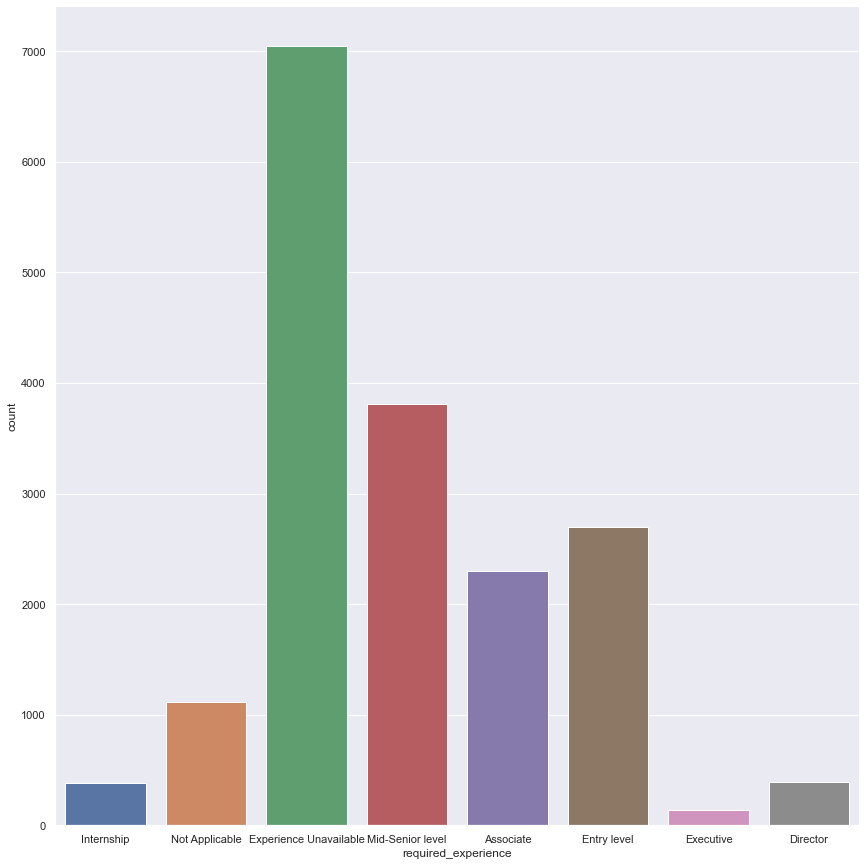

In [15]:
sb.catplot(x = 'required_experience', data = fakejobimpt, kind = "count", height = 12)

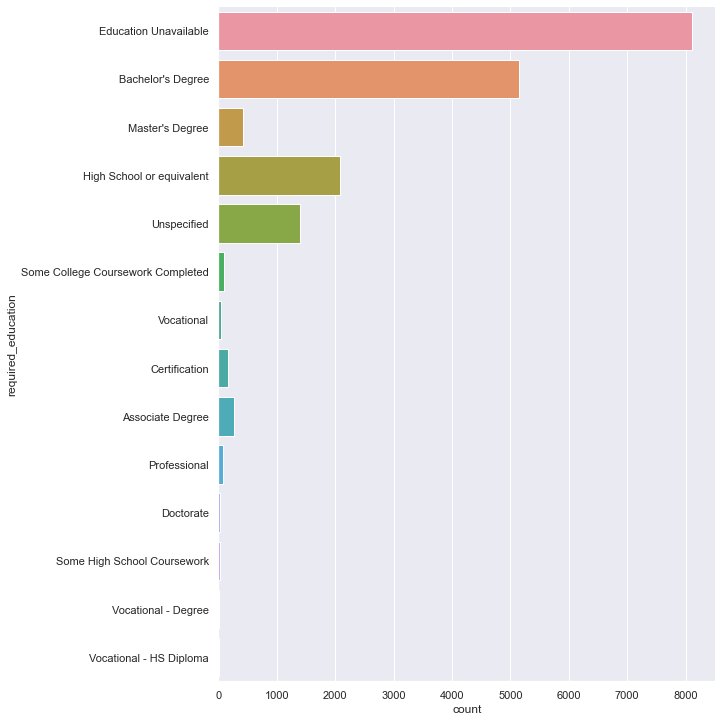

In [16]:
sb.catplot(y = 'required_education', data = fakejobimpt, kind = "count", height = 10)

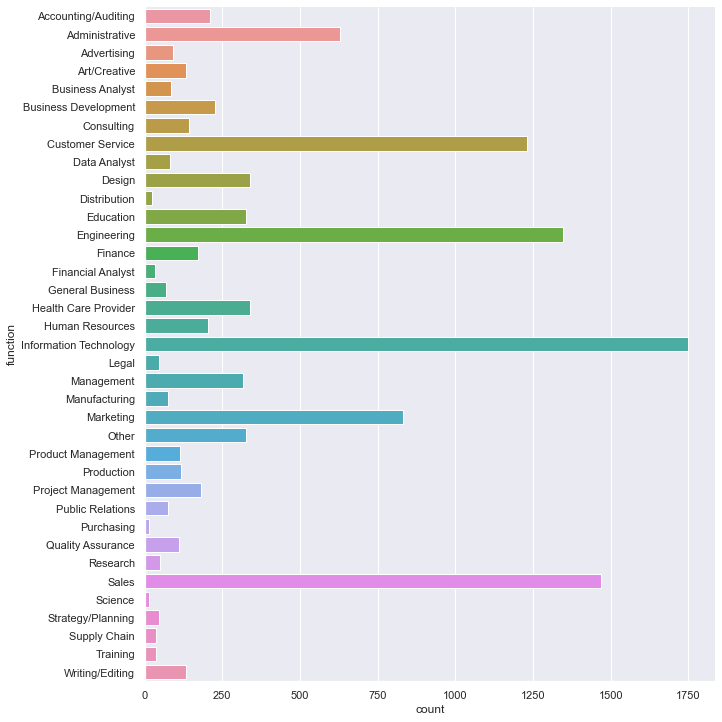

In [17]:
sb.catplot(y = 'function', data = fakejobimpt, kind = "count", height = 10)

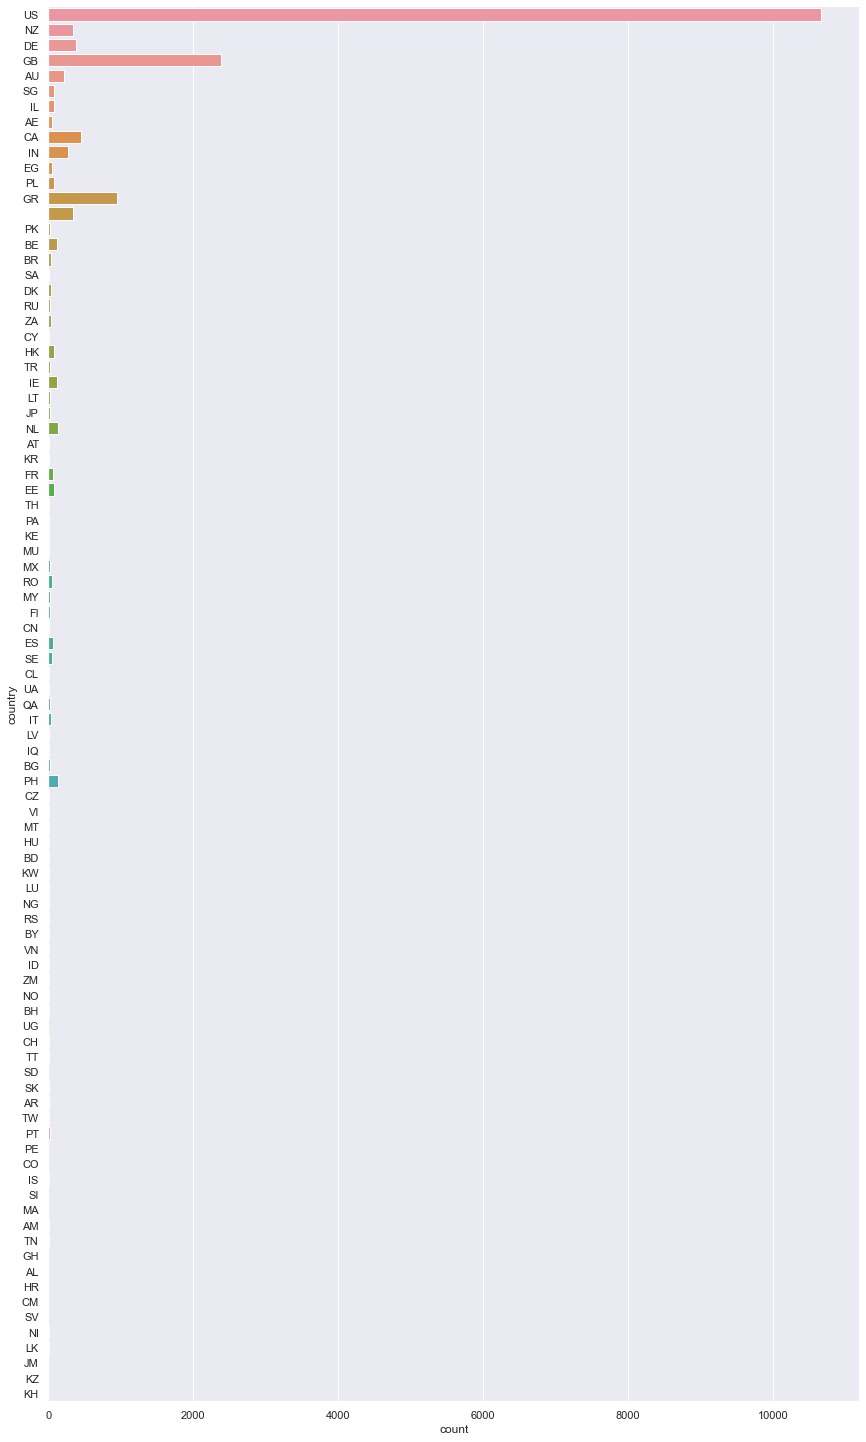

In [18]:
#Job posting distribution by country
location = fakejobimpt["location"].str.split(",", n = 1, expand = True)
fakejobimpt["country"] = location[0]

sb.catplot(y = 'country', data = fakejobimpt, kind = "count", height = 20, aspect=0.6)

<AxesSubplot:xlabel='has_company_logo'>

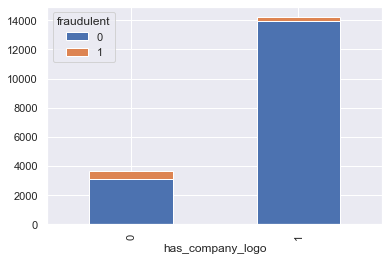

In [19]:
# Using numerical variables as factors for identifying fraudulent jobs
pd.crosstab(fakejobimpt['has_company_logo'],fakejobimpt['fraudulent']).plot.bar(stacked=True)

<AxesSubplot:xlabel='has_questions'>

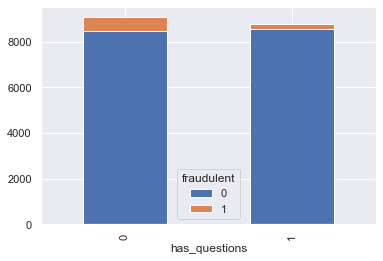

In [20]:
pd.crosstab(fakejobimpt['has_questions'],fakejobimpt['fraudulent']).plot.bar(stacked=True)

<AxesSubplot:xlabel='telecommuting'>

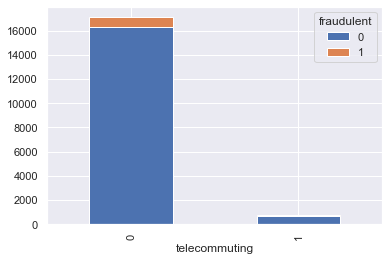

In [21]:
pd.crosstab(fakejobimpt['telecommuting'],fakejobimpt['fraudulent']).plot.bar(stacked=True)

In [22]:
# using categorical variables as factors for identifying fraudulent jobs
educationdata = pd.DataFrame(fakejobimpt[['required_education','fraudulent']])
y = educationdata.groupby('required_education')[['fraudulent']].sum()
print(y)

                                   fraudulent
required_education                           
Associate Degree                            6
Bachelor's Degree                         100
Certification                              19
Doctorate                                   1
Education Unavailable                     451
High School or equivalent                 170
Master's Degree                            31
Professional                                4
Some College Coursework Completed           3
Some High School Coursework                20
Unspecified                                61
Vocational                                  0
Vocational - Degree                         0
Vocational - HS Diploma                     0


<AxesSubplot:xlabel='required_education'>

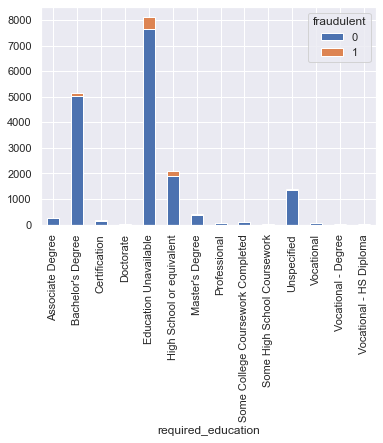

In [23]:
pd.crosstab(fakejobimpt['required_education'],fakejobimpt['fraudulent']).plot.bar(stacked=True)

In [24]:
employmentdata = pd.DataFrame(fakejobimpt[['employment_type','fraudulent']])
z = employmentdata.groupby('employment_type')[['fraudulent']].sum()
print(z)

                         fraudulent
employment_type                    
Contract                         44
Employement Unavailable         241
Full-time                       490
Other                            15
Part-time                        74
Temporary                         2


<AxesSubplot:xlabel='employment_type'>

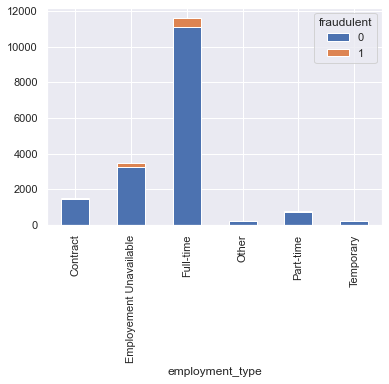

In [25]:
pd.crosstab(fakejobimpt['employment_type'],fakejobimpt['fraudulent']).plot.bar(stacked=True)

In [26]:
experiencedata = pd.DataFrame(fakejob[['required_experience','fraudulent']])
a = experiencedata.groupby('required_experience')[['fraudulent']].sum()
print(a)

                     fraudulent
required_experience            
Associate                    42
Director                     17
Entry level                 179
Executive                    10
Internship                   10
Mid-Senior level            113
Not Applicable               60


<AxesSubplot:xlabel='required_experience'>

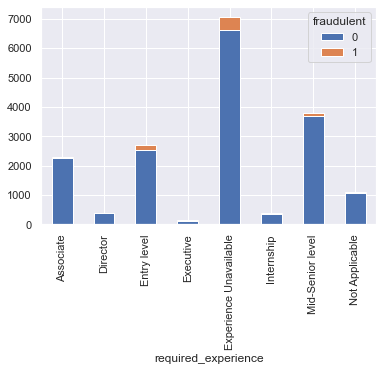

In [27]:
pd.crosstab(fakejobimpt['required_experience'],fakejobimpt['fraudulent']).plot.bar(stacked=True)

---
## Section 4: Machine Learning

In this section, we will run the train dataset through a few Machine Learning models and determine the best model in predicting fake jobs.

For this problem, the ML models will be predicting the fraudulent category(Real, Fraudulent)

In [28]:

fakejob.select_dtypes(include=['object']).head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


<AxesSubplot:>

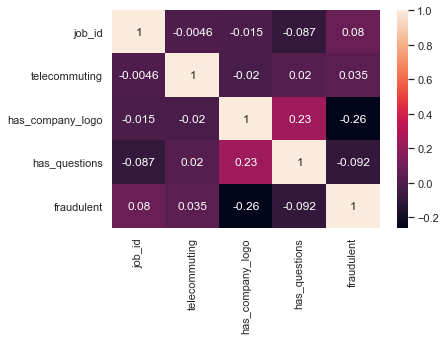

In [29]:
#Quick visualization of the correlation of variables
sb.heatmap(fakejob.corr(),annot=True)

In [30]:
# Dropping unnecessary columns 
fakejobdata=fakejob.drop(['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits'],axis=1)
fakejobdata

,job_id,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...
17875,17876,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [31]:
# create dummies of categorical columns 
dummies=pd.get_dummies(fakejobdata[["employment_type", "required_experience", "required_education", "industry", "function"]],drop_first=True)
fakejobdata=pd.concat([fakejobdata,dummies],axis=1)

In [32]:
fakejobdata = fakejobdata.drop(["employment_type", "required_experience", "required_education", "industry", "function"],axis=1)

In [33]:
fakejobdata

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17876,17877,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17877,17878,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17878,17879,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# split dataset into feature and target set 
X=fakejobdata.drop(['fraudulent'],axis=1) #predictors
Y=fakejobdata['fraudulent'] #response

In [35]:
# split the dataset into training and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

### 4.1 Decision Tree Classifier

Decision Trees are a type of Supervised Machine Learning where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split.

We have chosen `max_depth = 3` as higher `max_depth` may cause the test dataset to suffer due to overfitting of the data


In [36]:
# Importing the DecisionTreeClassifier & fitting the data
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth = 3)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9713167146053052

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9699850857568978



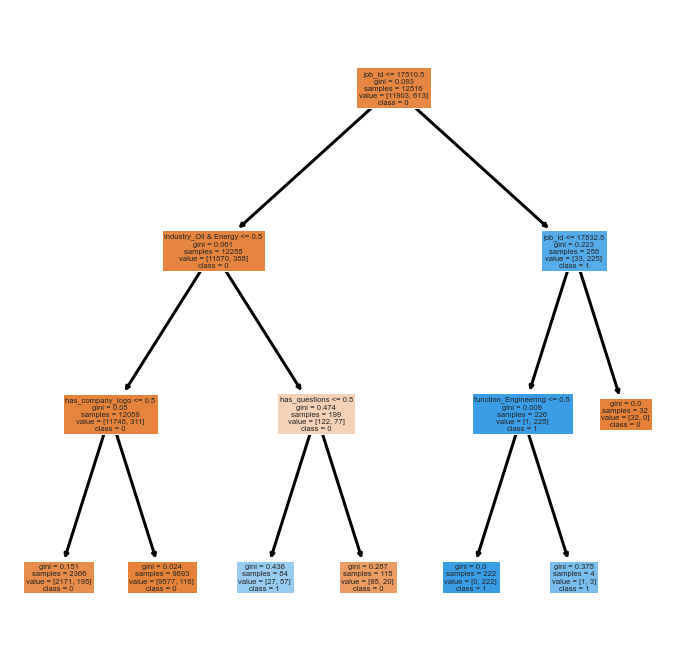

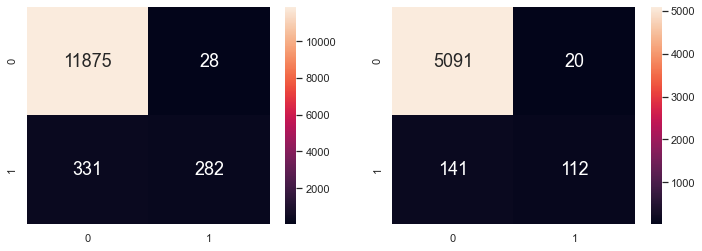

In [37]:
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()



# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])        
plt.show()

### 4.2 Random Forest Classifier

Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

Chosen `random_state = 101` which is to ensure that the model's output is replicable.

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

Goodness of Fit of Model (Classification Accuracy)
Train Dataset:	 1.0
Test Dataset:	 0.9789336316181954

Classification Report for test dataset
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5111
           1       0.87      0.65      0.74       253

    accuracy                           0.98      5364
   macro avg       0.93      0.82      0.87      5364
weighted avg       0.98      0.98      0.98      5364



<AxesSubplot:>

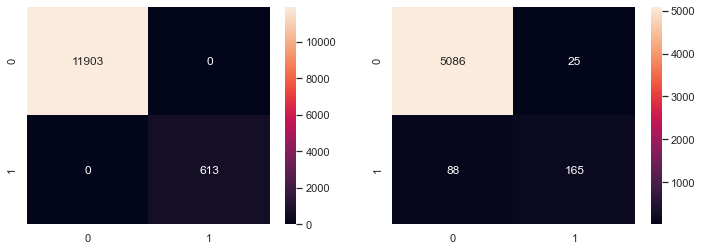

In [40]:
# Information regarding RandomForest
print('Goodness of Fit of Model (Classification Accuracy)')
print('Train Dataset:\t', rfc.score(X_train, y_train))
print('Test Dataset:\t', rfc.score(X_test, y_test))
print()

print('Classification Report for test dataset')
print(classification_report(y_test, y_test_pred))

from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize = (12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt = '.0f', ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt = '.0f', ax = axes[1])

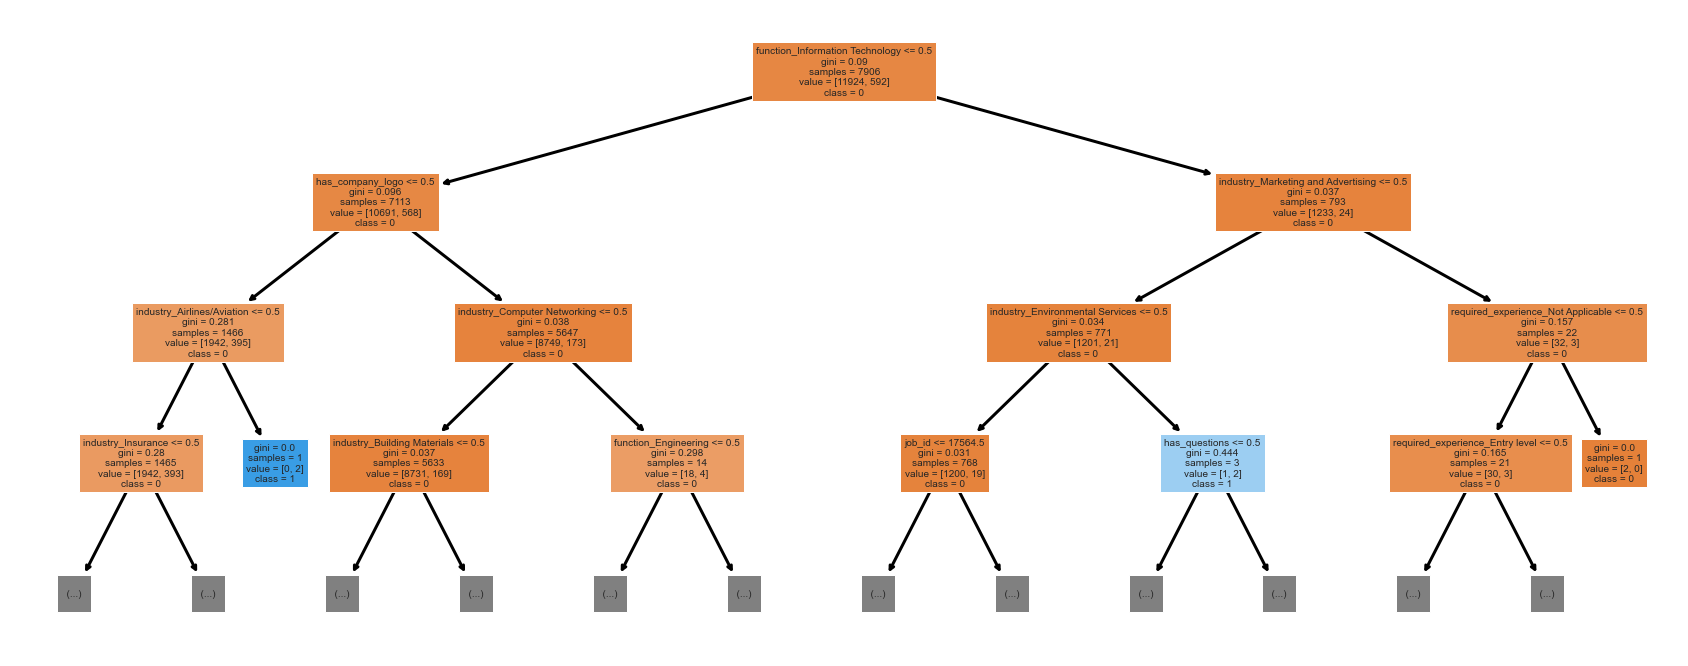

In [41]:
# Extract a single tree
m1 = rfc.estimators_[10]


from sklearn.tree import export_graphviz

#Visualise the decision tree (not working)
#treedot = export_graphviz(m1, out_file = None,
               # feature_names = X_train.columns,
               # class_names =[str(x) for x in dectree.classes_] ,
                #rounded = True,  
                #filled = True,
                #special_characters = True)


#import graphviz
#graphviz.Source(treedot)

#plotting decision tree of a single random forest tree.
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30,12))
out = plot_tree(m1, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          max_depth = 3,      
          filled=True,
          fontsize = 10)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

From the above, train and test data set yield similar results as their accuracy score are similar

### 4.3 Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(X_train, y_train.values.ravel())

y_train_pred = naive.predict(X_train)
y_test_pred = naive.predict(X_test)

Goodness of Fit of Model (Classification Accuracy)
Train Dataset:	 0.7242729306487695
Test Dataset:	 0.7307979120059657

Classification Report for test dataset
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      5111
           1       0.13      0.80      0.22       253

    accuracy                           0.73      5364
   macro avg       0.56      0.76      0.53      5364
weighted avg       0.95      0.73      0.81      5364



<AxesSubplot:>

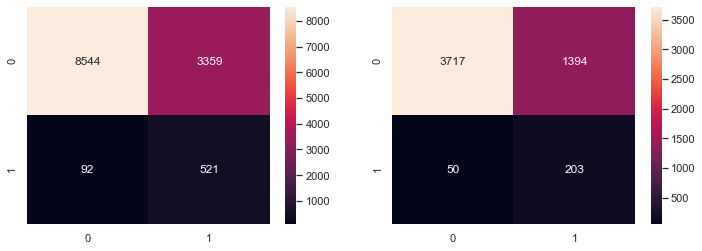

In [43]:
# Information regarding Naive Bayes
print('Goodness of Fit of Model (Classification Accuracy)')
print('Train Dataset:\t', naive.score(X_train, y_train))
print('Test Dataset:\t', naive.score(X_test, y_test))
print()

print('Classification Report for test dataset')
print(classification_report(y_test, y_test_pred))

from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize = (12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt = '.0f', ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt = '.0f', ax = axes[1])

### 4.4 KNeighbors Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train.values.ravel())

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

Goodness of Fit of Model (Classification Accuracy)
Train Dataset:	 0.9761105784595717
Test Dataset:	 0.9675615212527964

Classification Report for test dataset
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5111
           1       0.77      0.44      0.56       253

    accuracy                           0.97      5364
   macro avg       0.87      0.72      0.77      5364
weighted avg       0.96      0.97      0.96      5364



<AxesSubplot:>

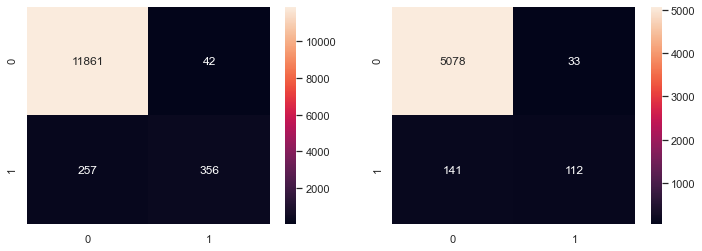

In [45]:
# Gathering information regarding the accuracy of KNN
print('Goodness of Fit of Model (Classification Accuracy)')
print('Train Dataset:\t', knn.score(X_train, y_train))
print('Test Dataset:\t', knn.score(X_test, y_test))
print()

print('Classification Report for test dataset')
print(classification_report(y_test, y_test_pred))

from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize = (12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt = '.0f', ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt = '.0f', ax = axes[1])

### 4.5 Support Vector Classifier

In [49]:
from sklearn.svm import SVC

svc = SVC(probability = True)
svc.fit(X_train, y_train.values.ravel())

y_pred_svc = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

Goodness of Fit of Model (Classification Accuracy)
Train Dataset:	 0.9510226909555769
Test Dataset:	 0.9528337061894109


<AxesSubplot:>

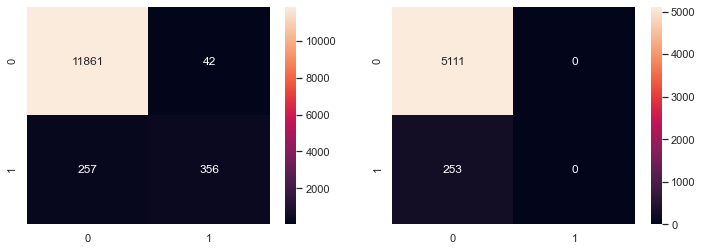

In [50]:
print('Goodness of Fit of Model (Classification Accuracy)')
print('Train Dataset:\t', svc.score(X_train, y_train))
print('Test Dataset:\t', svc.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize = (12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt = '.0f', ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt = '.0f', ax = axes[1])

---
## Section 5: Conclusion

Comparison of the results from the Machine Learning Models to find out which yields the most accurate results.

In [46]:
    dec = DecisionTreeClassifier()
    rfc = RandomForestClassifier(n_estimators=30)
    knn = KNeighborsClassifier(n_neighbors=30)
    svm = SVC(random_state=1)
    naive = GaussianNB()

    models = {"Decision Tree" : dec,
              "Random Forest" : rfc,
              "KNN" : knn,
              "SVM" : svm,
              "Naive Bayes" : naive}
    scores= { }

    for key, value in models.items():    
        model = value
        model.fit(X_train, y_train)
        scores[key] = model.score(X_test, y_test)

In [47]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random Forest,0.979866
Decision Tree,0.974646
KNN,0.969985
SVM,0.952834
Naive Bayes,0.730798


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'KNN'),
  Text(3, 0, 'SVM'),
  Text(4, 0, 'Naive Bayes')])

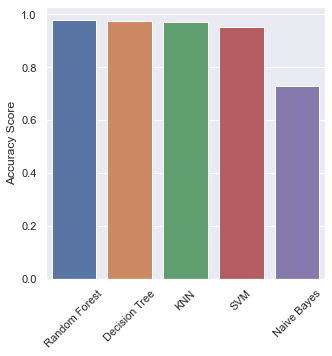

In [48]:
#Quick plot of ML accuracy comparison
plt.figure(figsize=(5,5))
sb.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45)

### Based on the accuracy scores, Random forest has the highest accuracy score of 0.979 followed by Decision Tree with a close second of 0.976, KNN of 0.970, SVM of 0.953 and the least accurate Naive Bayes of 0.731. Therefore, Random Forest Model can be used to train and test the for prediction and machine learning accurately.

<br><br><br><br><h1> Project Takeaways: </h1>
<br>→ Pre-processing: 
<br>→ Data Visualisation: 
<br>→ Machine Learning Techniques:
        1. KNeighbors
        2. Random Forest 
        3. Naive Bayes
        4. Decision Tree Classifier
        Problems Encountered: Categorical data had to be represented by dummy variables(a numeric variable that represents categorical data)